In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [89]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [90]:
data['Time'] = pd.to_datetime(data['Time'])

In [91]:
data.set_index('Time', inplace=True)

In [92]:
data.drop(columns=['ESI 1', 'ESI 2', 'ESI 3', 'ESI 5'], inplace=True)

In [93]:
esi1_daily = data['ESI 4'].resample('D').sum()

In [94]:
esi1_daily_df = esi1_daily.reset_index()

In [95]:
esi1_daily_df.columns = ['Date', 'ESI 4']

In [96]:
print(esi1_daily_df)

           Date  ESI 4
0    2017-01-01     47
1    2017-01-02     66
2    2017-01-03     51
3    2017-01-04     41
4    2017-01-05     46
...         ...    ...
1456 2020-12-27     36
1457 2020-12-28     40
1458 2020-12-29     51
1459 2020-12-30     38
1460 2020-12-31     37

[1461 rows x 2 columns]


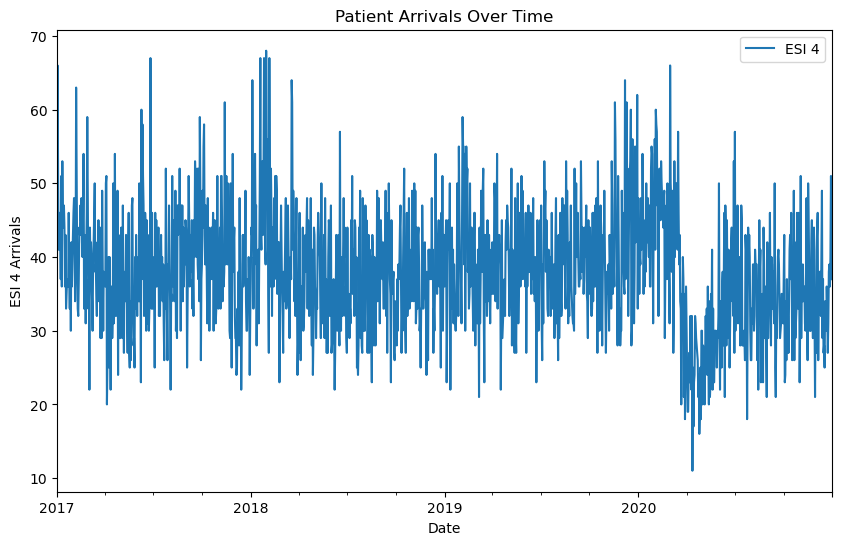

In [97]:
esi1_daily_df.plot(x='Date', y='ESI 4', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 4 Arrivals')
plt.show()

In [98]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [99]:
model = ExponentialSmoothing(train['ESI 4'], seasonal='add', seasonal_periods=7)
fitted_model = model.fit()

In [100]:
forecast_values = fitted_model.forecast(len(test))

In [101]:
forecast_values

1314    32.400940
1315    31.179954
1316    32.508510
1317    37.645079
1318    35.861436
          ...    
1456    32.508510
1457    37.645079
1458    35.861436
1459    34.157582
1460    32.975002
Length: 147, dtype: float64

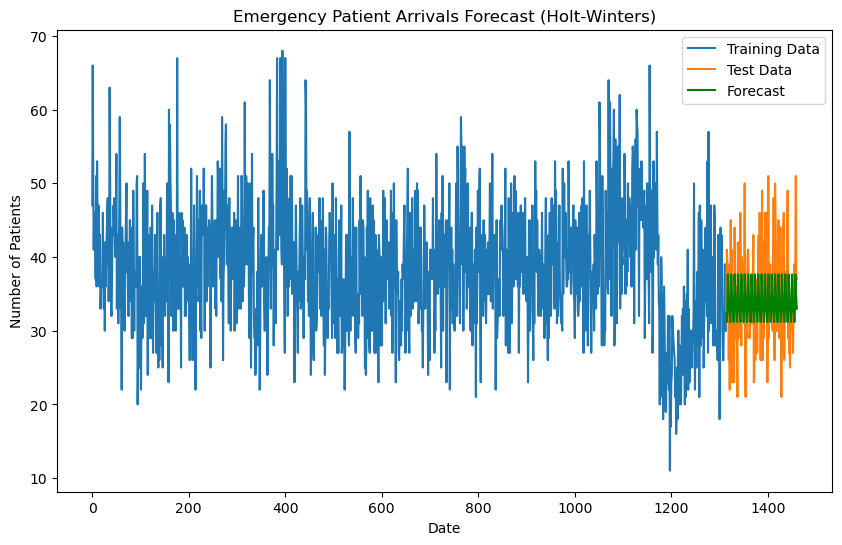

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 4'], label='Training Data')
plt.plot(test.index, test['ESI 4'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='green')
plt.title('Emergency Patient Arrivals Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [103]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['ESI 4'], forecast_values)
print("MAPE:", mape)

MAPE: 16.170025363755368


In [104]:
rmse = np.sqrt(mean_squared_error(test['ESI 4'], forecast_values))
print("RMSE:", rmse)

RMSE: 6.763152537932831


In [105]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 4'], forecast_values)
print("MAE:", mae)

MAE: 5.4707392312361
